# Temperature Forecast Project using ML

### Problem Statement:

##### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


- Attribute Information:

- For more information, read [Cho et al, 2020].
- 1. station - used weather station number: 1 to 25
- 2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
- 3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
- 4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
- 5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
- 6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
- 7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
- 8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
- 9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
- 10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
- 11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
- 12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
- 13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
- 14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
- 15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
- 16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
- 17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
- 18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
- 19. lat - Latitude (Â°): 37.456 to 37.645
- 20. lon - Longitude (Â°): 126.826 to 127.135
- 21. DEM - Elevation (m): 12.4 to 212.3
- 22. Slope - Slope (Â°): 0.1 to 5.2
- 23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
- 24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
- 25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [74]:
#Loading Dataset

df = pd.read_csv(r'E:\temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


- Dataset Consists of 7752 rows and 25 columns

In [3]:
#Checking null values

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

- There are null values present in our dataset which we need to treat.

In [75]:
#Replace all the null values with median of that column :

for col in df.columns:
    if col not in ['station','Date']:
        df[col] = df[col].replace(np.nan, df[col].median())

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


In [ ]:
# Only Date column is object data type rest all are float dayta types

In [6]:
#Checking stats
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [77]:
# Checking uniqueness

for i in df.columns:
    print (i,':',len(df[i].unique()))

station : 26
Date : 311
Present_Tmax : 167
Present_Tmin : 155
LDAPS_RHmin : 7672
LDAPS_RHmax : 7664
LDAPS_Tmax_lapse : 7675
LDAPS_Tmin_lapse : 7675
LDAPS_WS : 7675
LDAPS_LH : 7675
LDAPS_CC1 : 7569
LDAPS_CC2 : 7582
LDAPS_CC3 : 7599
LDAPS_CC4 : 7524
LDAPS_PPT1 : 2812
LDAPS_PPT2 : 2510
LDAPS_PPT3 : 2356
LDAPS_PPT4 : 1918
lat : 12
lon : 25
DEM : 25
Slope : 27
Solar radiation : 1575
Next_Tmax : 183
Next_Tmin : 157


In [9]:
#Let's check uniqueness for 'station'

df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

#### By observing the whole data set we came to know that there are 25 stations and the data is collected from each of the stations every day. Station and Date columns having null values at the very last, and null values in station is present after 25, which means this data is collected from next date.

In [78]:
# Replacing the null values in stqtion column, considering it as from next day
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

In [79]:
#Replacing null values in 'Date' columns with next date of 30-08-2017
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

In [80]:
#extracting Date into more usable format :

df["day"] = pd.to_datetime(df["Date"], format="%d-%m-%Y").dt.day
df["month"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y").dt.month
df["year"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y").dt.year

## Now we can drop Date as it is of no use:

df.drop(["Date"], axis = 1, inplace = True)
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30,8,2017
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30,8,2017
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,31,8,2017


In [13]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

In [14]:
df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
day                  0
month                0
year                 0
dtype: int64

##### Data Visualisation and EDA

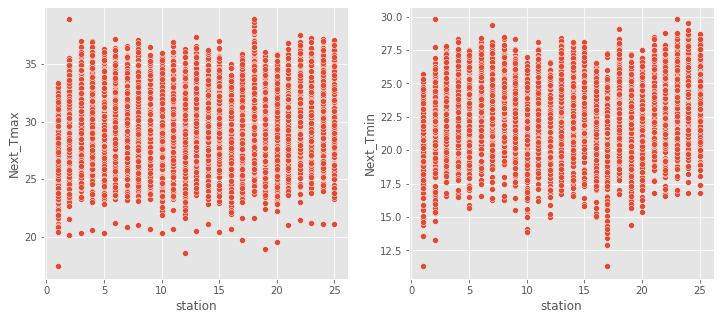

In [18]:
# Scatterplots for station vs Next_Tmax and Next_Tmin

plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'station', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'station', y = 'Next_Tmin', data = df)
plt.show()

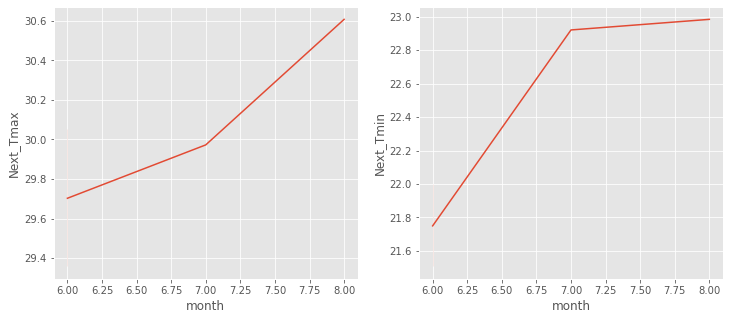

In [21]:
#Relationship of month,day and year with 'Next_Tmax' and 'Next_Tmin' through line plot

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.lineplot(x = 'month', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.lineplot(x = 'month', y = 'Next_Tmin', data = df)
plt.show()

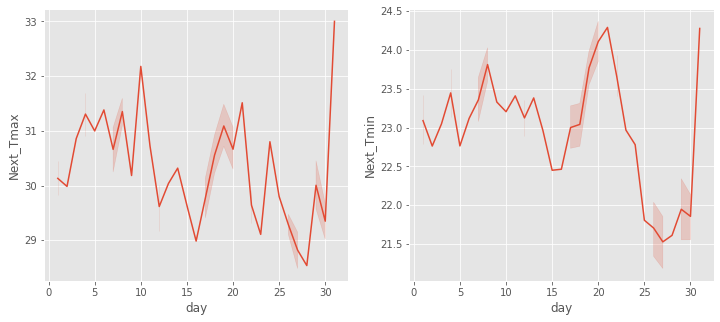

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.lineplot(x = 'day', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.lineplot(x = 'day', y = 'Next_Tmin', data = df)
plt.show()

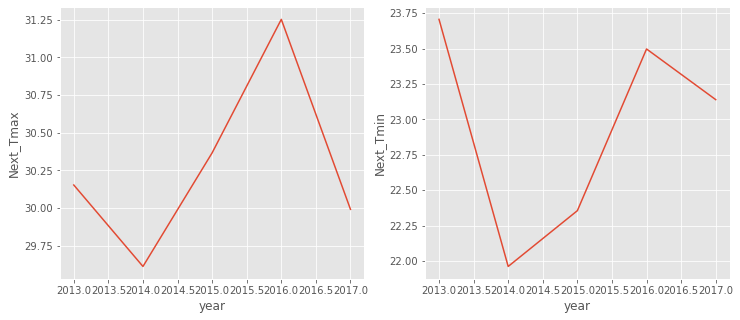

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.lineplot(x = 'year', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.lineplot(x = 'year', y = 'Next_Tmin', data = df)
plt.show()

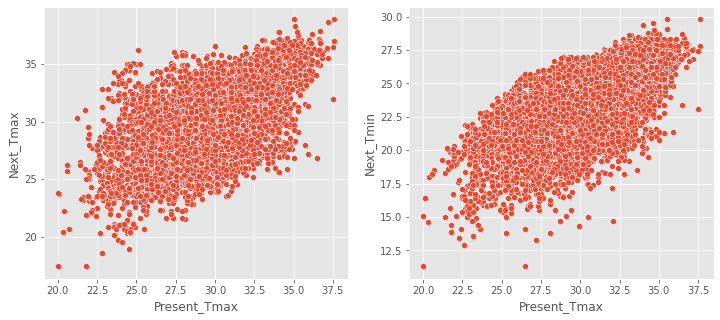

In [24]:
# Scatterplots for Present_Tmax vs Next_Tmax and Next_Tmin

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Present_Tmax', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Present_Tmax', y = 'Next_Tmin', data = df)
plt.show()

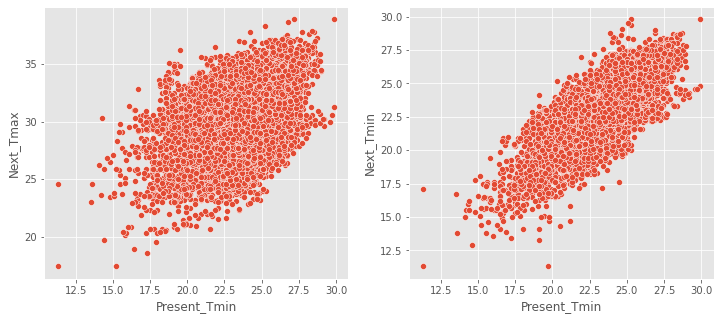

In [25]:
# lets see relation of 'Present_Tmin' with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Present_Tmin', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Present_Tmin', y = 'Next_Tmin', data = df)
plt.show()

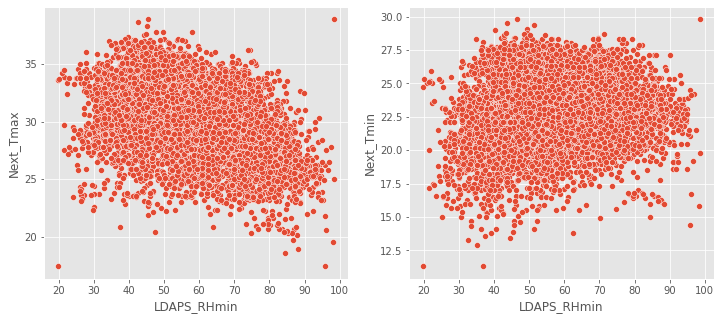

In [26]:

# lets see relation between LDAPS_RHmin with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_RHmin', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_RHmin', y = 'Next_Tmin', data = df)
plt.show()

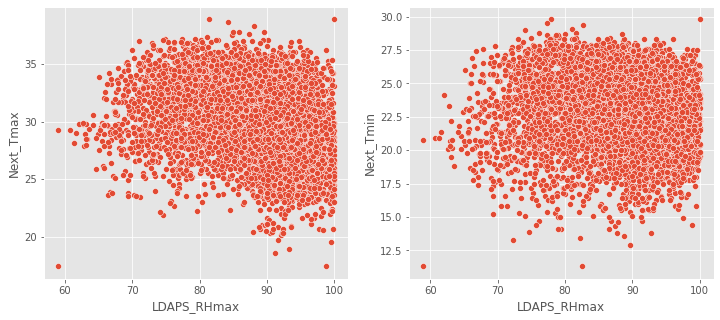

In [27]:

# lets see relation between LDAPS_RHmin with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_RHmax', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_RHmax', y = 'Next_Tmin', data = df)
plt.show()

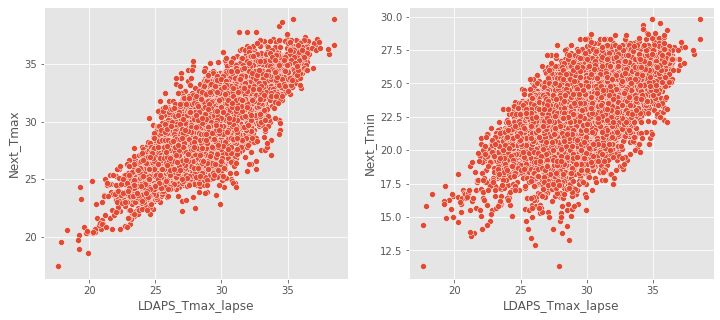

In [28]:

# lets see relation between LDAPS_Tmax_lapse with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_Tmax_lapse', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_Tmax_lapse', y = 'Next_Tmin', data = df)
plt.show()

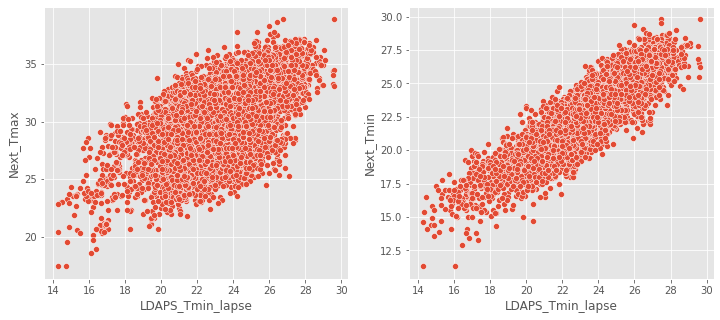

In [29]:

# lets see relation between LDAPS_Tmin_lapse with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_Tmin_lapse', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_Tmin_lapse', y = 'Next_Tmin', data = df)
plt.show()


- Relationship looks highly linear between LDAPS_Tmin_lapse with Next_Tmax and Next_Tmin.

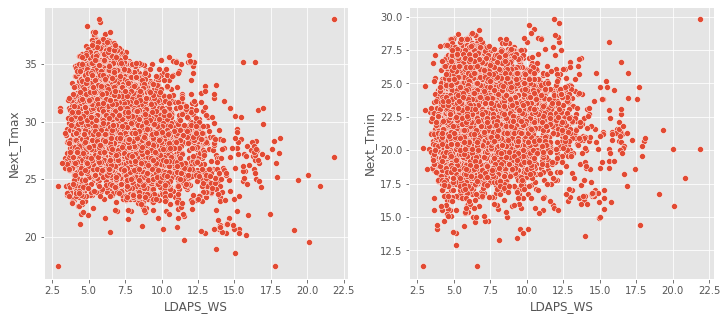

In [30]:

# lets see relation between LDAPS_WS (WIND SPEED) with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_WS', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_WS', y = 'Next_Tmin', data = df)
plt.show()

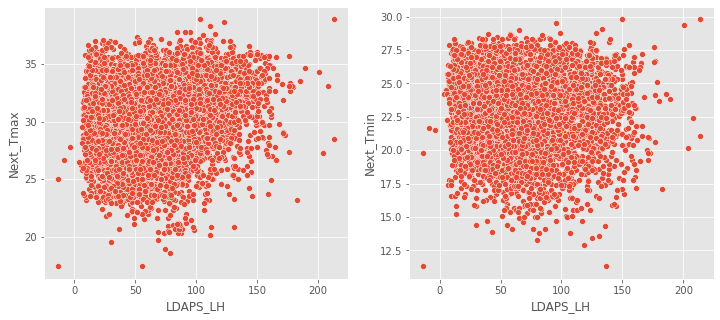

In [31]:
# lets see relation between LDAPS_LH with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_LH', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_LH', y = 'Next_Tmin', data = df)
plt.show()

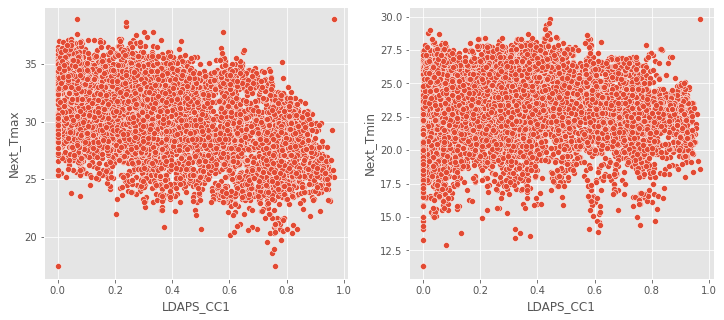

In [32]:
# lets see relation between LDAPS_CC1 with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC1', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC1', y = 'Next_Tmin', data = df)
plt.show()

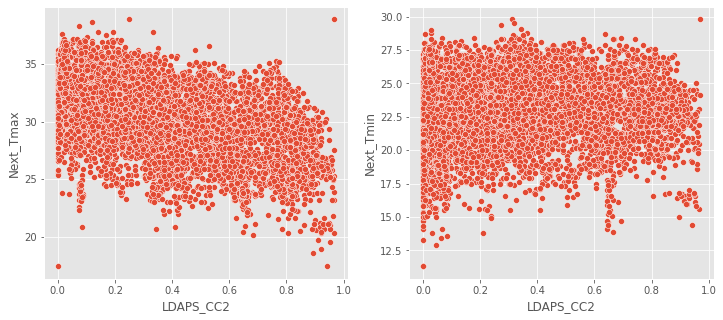

In [33]:
# lets see relation between LDAPS_CC2 with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC2', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC2', y = 'Next_Tmin', data = df)
plt.show()

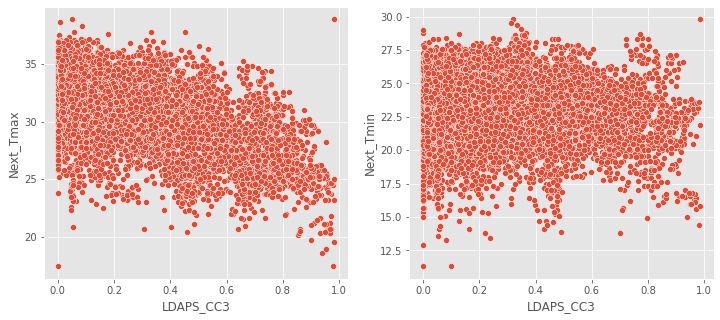

In [34]:
# lets see relation between LDAPS_CC3 with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC3', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC3', y = 'Next_Tmin', data = df)
plt.show()

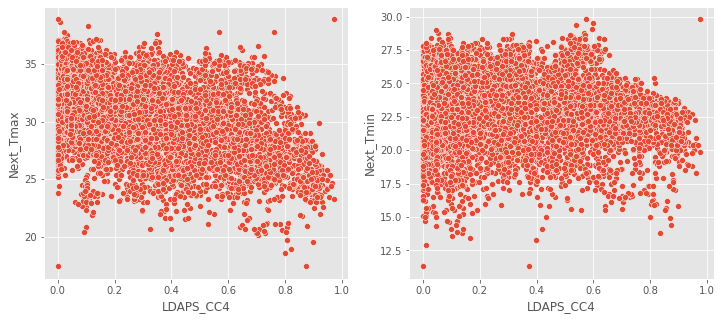

In [35]:
# lets see relation between LDAPS_CC4 with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_CC4', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_CC4', y = 'Next_Tmin', data = df)
plt.show()

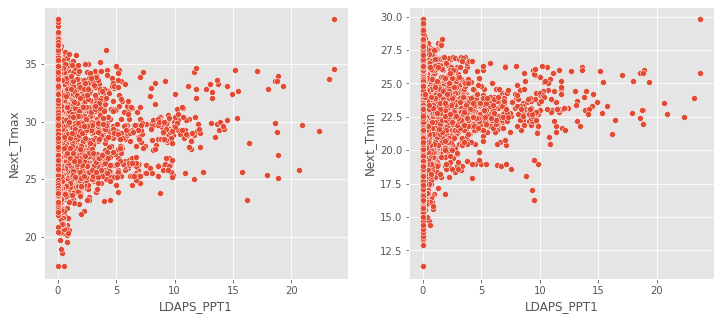

In [36]:
# lets see relation between LDAPS_PPT1 with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT1', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT1', y = 'Next_Tmin', data = df)
plt.show()

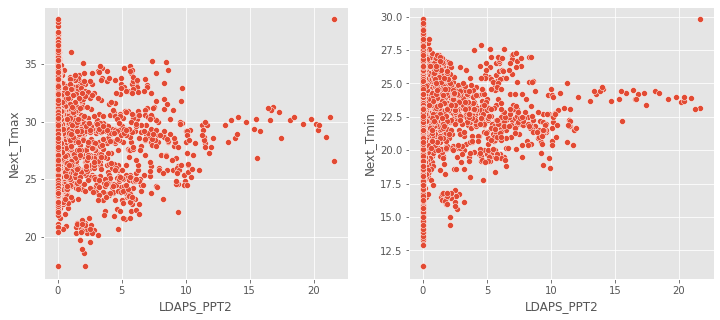

In [37]:
# lets see relation between LDAPS_PPT1 with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT2', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT2', y = 'Next_Tmin', data = df)
plt.show()

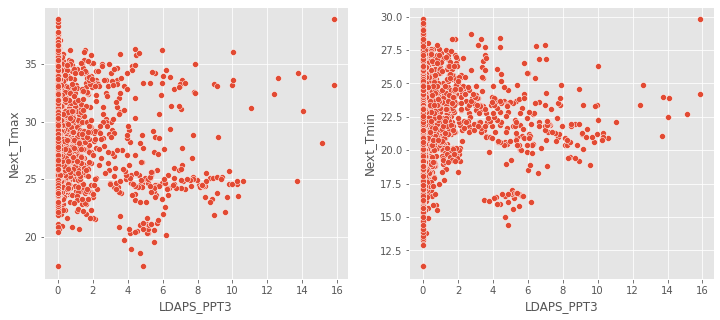

In [38]:
# lets see relation between LDAPS_PPT3 with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT3', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT3', y = 'Next_Tmin', data = df)
plt.show()

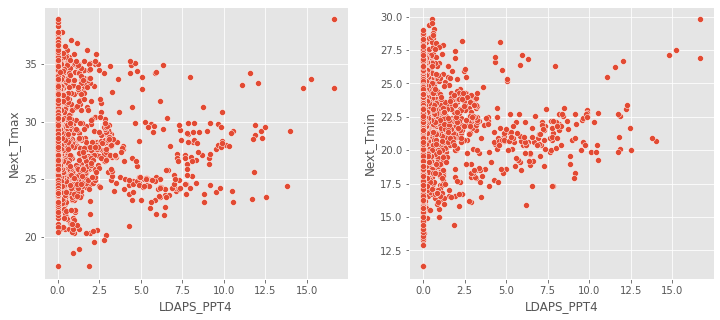

In [39]:
# lets see relation between LDAPS_PPT4 with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'LDAPS_PPT4', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'LDAPS_PPT4', y = 'Next_Tmin', data = df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

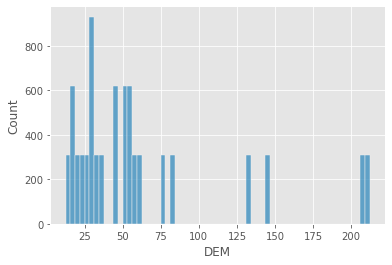

In [42]:
#Checking distribution through histplot of 'DEM'

sns.histplot(df['DEM'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

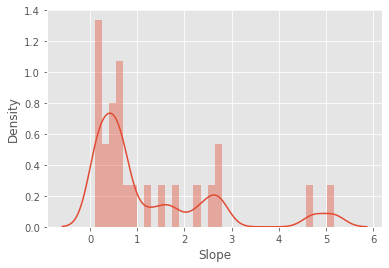

In [43]:
#Checking Distplot for slope

sns.distplot(df['Slope'])
plt.show

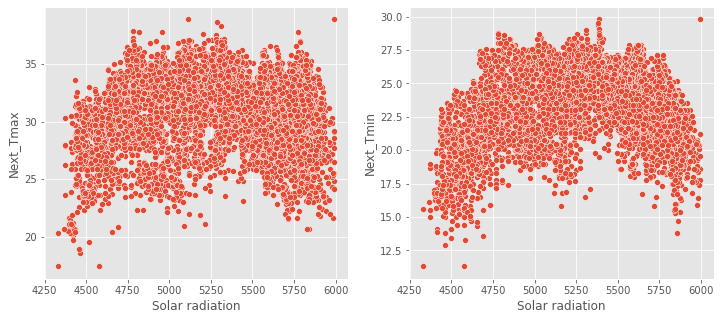

In [44]:
# lets see relation between 'Solar radiation' with Next_Tmax and Next_Tmin:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Solar radiation', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Solar radiation', y = 'Next_Tmin', data = df)
plt.show()

<AxesSubplot:>

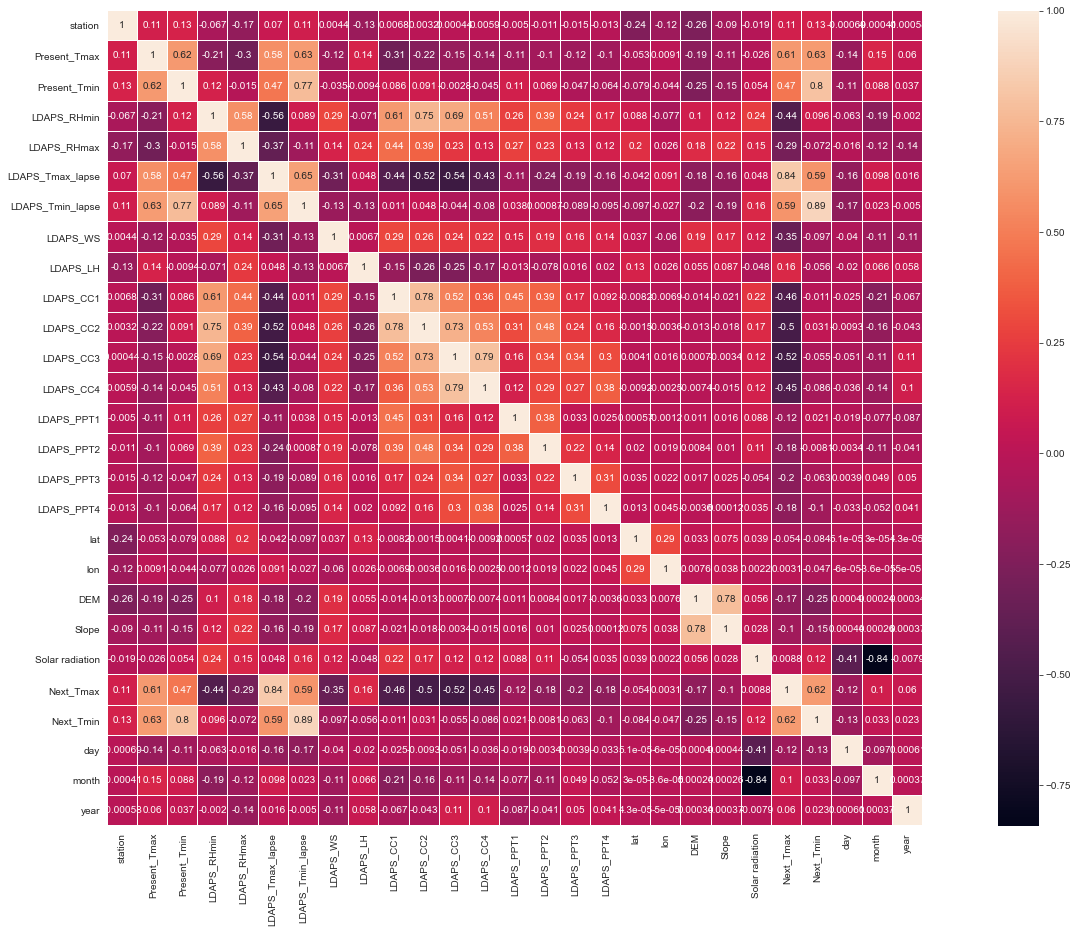

In [49]:
#Heatmap and correlation

sns.set_style("darkgrid")
plt.figure(figsize=(27,15))
corr = df.corr()
sns.heatmap(corr, annot=True,linewidths=0.1,square=True)

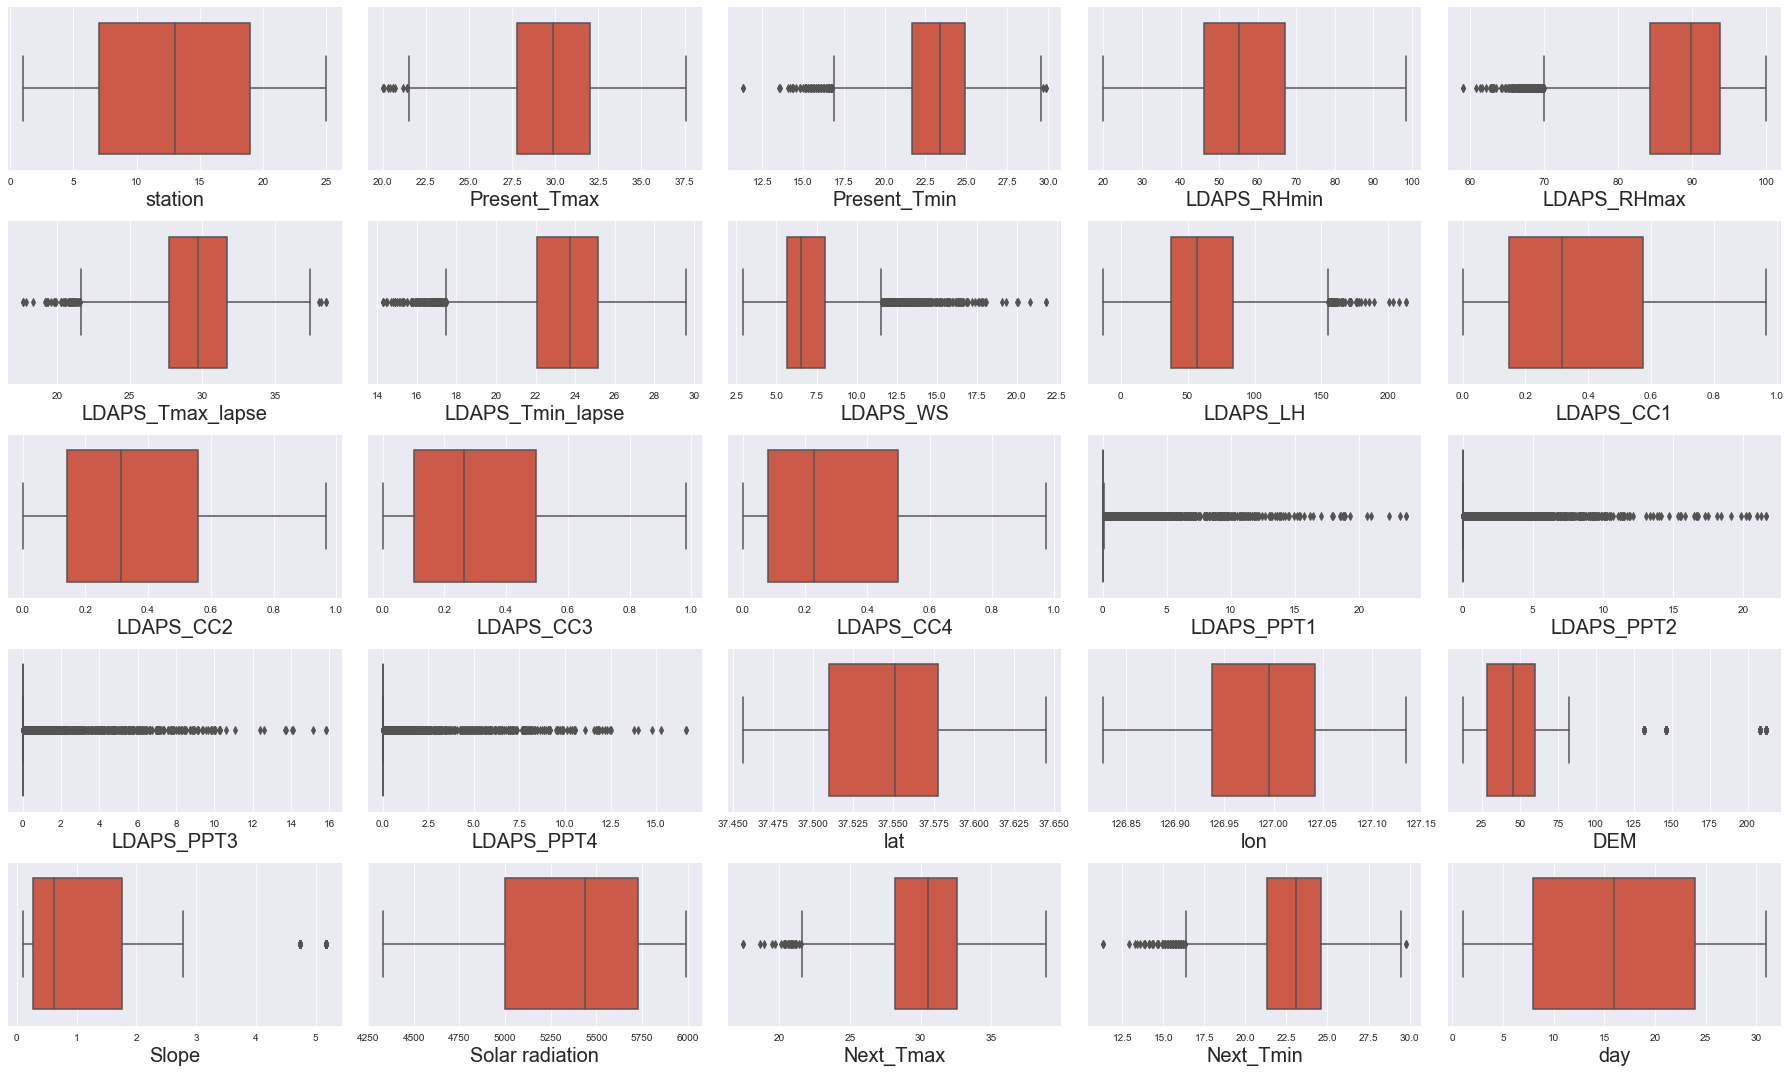

In [50]:
#Checking outliers using box plot

plt.figure(figsize = (25,15))
plotnumber = 1
for column in df:
    if plotnumber <=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

- Boxplot shows us that our dataset contains outliers.

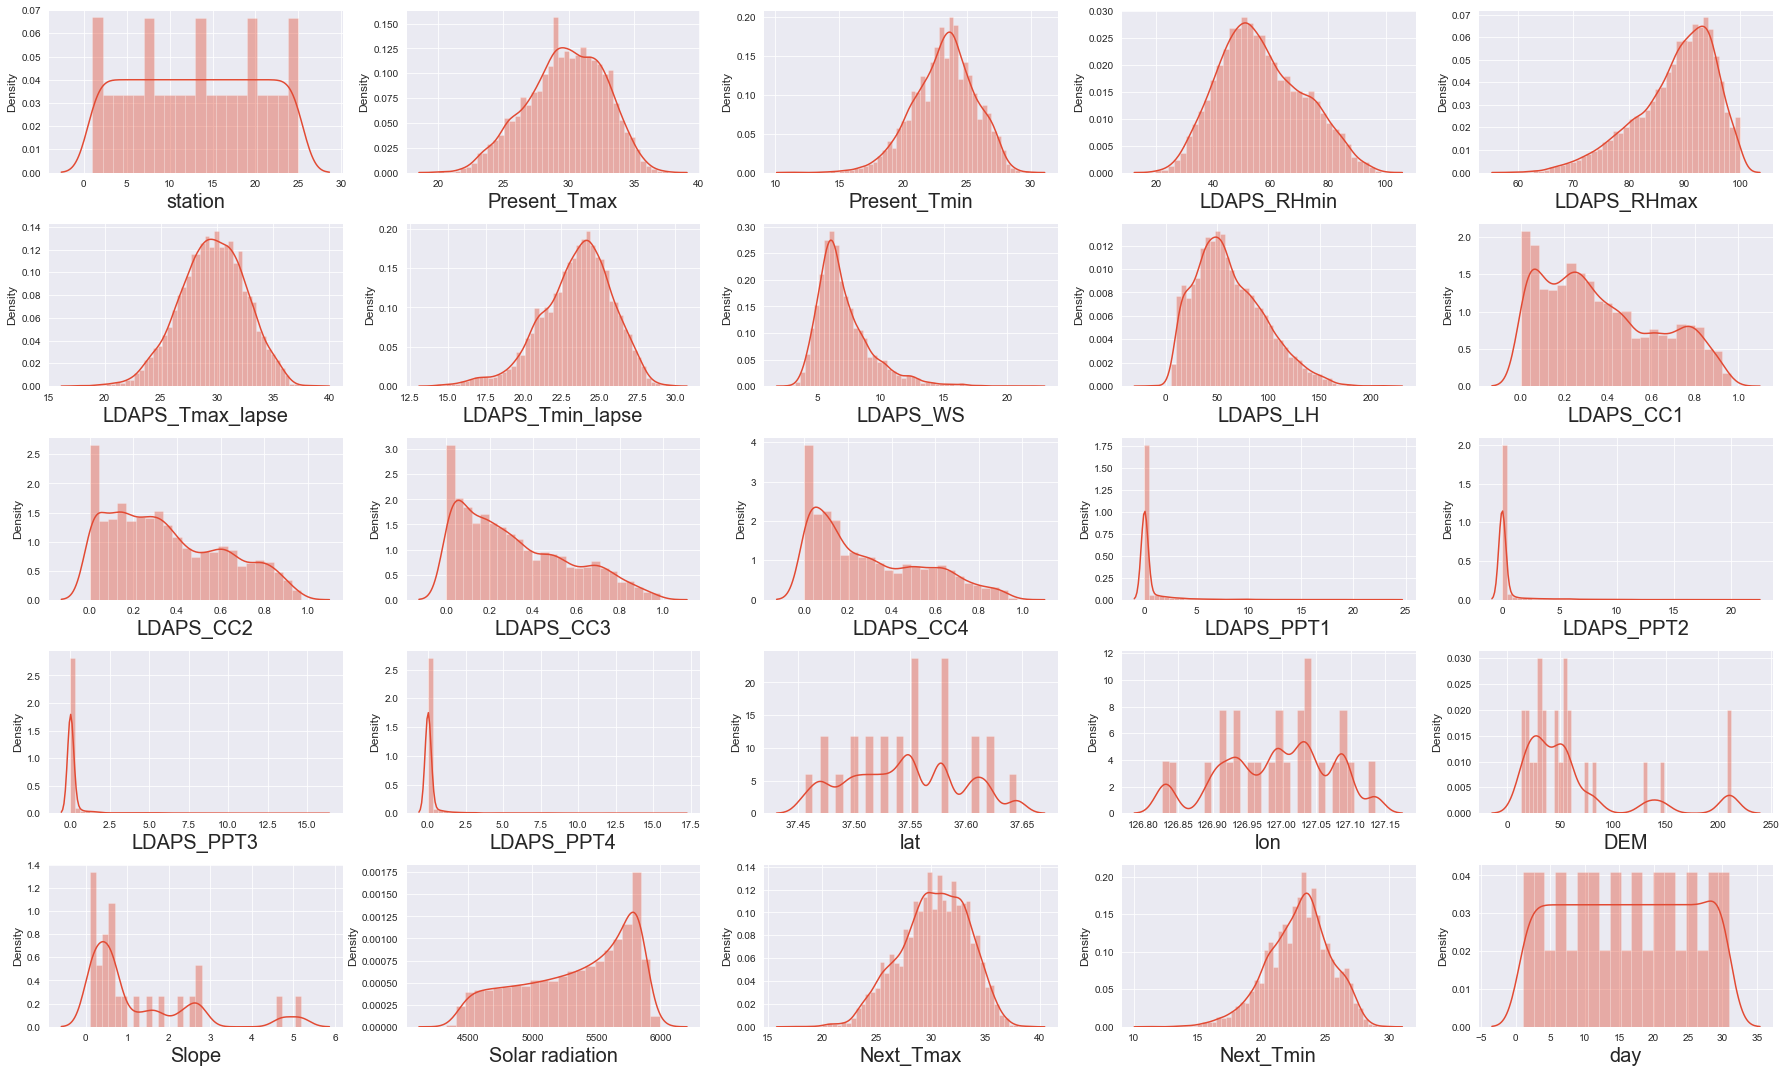

In [51]:
#Checking skewness using distplot using box plot

plt.figure(figsize = (25,15))
plotnumber = 1
for column in df:
    if plotnumber <=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

- From distribution plot we can see that our data is skewed on some columns.

In [52]:
#Checking for skewness :

df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
day                -0.008989
month              -0.196329
year               -0.000365
dtype: float64

In [81]:
#Removing outliers using Z score method :

from scipy import stats
z=np.abs(stats.zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','DEM','Slope']]))
print(z)
print('row no. : ',np.where(z>3)[0])

[[0.36172509 0.76016871 0.38108836 ... 0.20856357 2.77224286 1.11500407]
 [0.72067506 0.67693727 0.30961004 ... 0.31317262 0.31515742 0.54215762]
 [0.61920005 0.03053001 0.61678354 ... 1.24748845 0.52621832 0.7231326 ]
 ...
 [2.22210036 2.42479758 1.55696714 ... 1.58955664 0.77904331 0.71933797]
 [3.30450051 4.96335662 4.11458611 ... 2.26556705 0.91196325 0.8454552 ]
 [2.64870034 2.77716765 1.62218605 ... 4.49706172 2.77224286 2.86143459]]
row no. :  [  25   33   44  175  194  269  294  344  375  394  419  494  519  544
  569  575  584  594  969 1324 1424 1494 1652 1661 1663 1664 1670 1674
 1778 1779 1781 1791 1794 2175 2176 2177 2178 2179 2179 2180 2181 2181
 2182 2183 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194 2195
 2196 2197 2198 2199 2353 2354 2356 2369 2375 2378 2394 2441 2528 2544
 2569 2675 2775 3104 3116 3191 3202 3209 3211 3215 3216 3220 3224 3261
 3263 3264 3266 3268 3272 3273 3286 3288 3289 3298 3375 3378 3394 3400
 3404 3406 3407 3408 3409 3411 3413 3419 3441 34

In [82]:
index = (np.where(z>3)[0])
df1=df.drop(df.index[index])
df1.shape
#Checking Shape after cleaning outliers

(7483, 27)

##### 1.) FOR 'Next_Tmax'

In [86]:
#Treating skewed data for features :

x = df1.drop(columns=['Next_Tmax'],axis=1) #Seperating feature and label in x and y
y = df1['Next_Tmax']

for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.cbrt(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [88]:
x.skew()

station             0.004649
Present_Tmax       -0.227490
Present_Tmin       -0.217935
LDAPS_RHmin         0.284346
LDAPS_RHmax        -0.755434
LDAPS_Tmax_lapse   -0.096644
LDAPS_Tmin_lapse   -0.381931
LDAPS_WS            0.576039
LDAPS_LH           -0.312649
LDAPS_CC1           0.487257
LDAPS_CC2           0.473759
LDAPS_CC3           0.191622
LDAPS_CC4          -0.454967
LDAPS_PPT1          1.989819
LDAPS_PPT2          2.317437
LDAPS_PPT3          2.637855
LDAPS_PPT4          2.956772
lat                 0.104304
lon                -0.286980
DEM                 0.943008
Slope               0.626847
Solar radiation    -0.501098
Next_Tmin          -0.270784
day                 0.003300
month              -0.197828
year                0.011210
dtype: float64

In [89]:
#Applying Standard Scalar on feature datasets

scalar = StandardScaler()
X = scalar.fit_transform(x)

### Model Instantiation and Training

In [90]:
#Importing all regression models : 

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [93]:
#Finding Best Random State on Random Forest


max_accu=0
max_rs = 0
for i in range(1,10):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.9171857977551052 on Random State 1


In [94]:
#Splitting data into training and testing with best random state :

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

In [95]:
result=[]
#To save model scores
mse=[]
#To save Mean Squared Error scores

##### Linear Regression

In [96]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred=lr.predict(x_test)
r2_lr=r2_score(y_test,y_lr_pred)

print("R2 SCORE :",r2_lr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_lr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_lr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_lr_pred)))

result.append(r2_lr)
mse.append(mean_squared_error(y_test,y_lr_pred))

R2 SCORE : 0.798119532532301
Mean Squared Error :  1.85794133028826
Mean Absolute Error :  1.0410523614758829
Root Mean squared Error :  1.363063215807785


##### Random Forest Regressor

In [97]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr_pred=rfr.predict(x_test)
r2_rfr=r2_score(y_test,y_rfr_pred)

print("R2 SCORE :",r2_rfr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rfr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rfr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rfr_pred)))

result.append(r2_rfr)
mse.append(mean_squared_error(y_test,y_rfr_pred))

R2 SCORE : 0.9170788363217262
Mean Squared Error :  0.7631380048102615
Mean Absolute Error :  0.6552095136290753
Root Mean squared Error :  0.8735777039338066


##### Gradient Boosting Regressor

In [98]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_gbr_pred=gbr.predict(x_test)
r2_gbr=r2_score(y_test,y_gbr_pred)

print("R2 SCORE :",r2_gbr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_gbr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_gbr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_gbr_pred)))

result.append(r2_gbr)
mse.append(mean_squared_error(y_test,y_gbr_pred))

R2 SCORE : 0.8624878991947561
Mean Squared Error :  1.2655479685854534
Mean Absolute Error :  0.8697802813039676
Root Mean squared Error :  1.1249657632948007


##### Decision Tree Regressor

In [99]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr_pred=dtr.predict(x_test)
r2_dtr=r2_score(y_test,y_dtr_pred)

print("R2 SCORE :",r2_dtr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_dtr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_dtr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_dtr_pred)))

result.append(r2_dtr)
mse.append(mean_squared_error(y_test,y_dtr_pred))

R2 SCORE : 0.7664633789591608
Mean Squared Error :  2.1492784607161943
Mean Absolute Error :  1.0476750400855157
Root Mean squared Error :  1.466041766361448


##### Ridge

In [100]:
rg=Ridge(alpha=0.001)
rg.fit(x_train,y_train)
y_rg_pred=rg.predict(x_test)
r2_rg=r2_score(y_test,y_rg_pred)

print("R2 SCORE :",r2_rg)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rg_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rg_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rg_pred)))

result.append(r2_rg)
mse.append(mean_squared_error(y_test,y_rg_pred))

R2 SCORE : 0.7981194916235407
Mean Squared Error :  1.8579417067787523
Mean Absolute Error :  1.0410523868949875
Root Mean squared Error :  1.3630633539123382


##### Lasso

In [101]:
ls=Lasso(alpha=0.0002)
ls.fit(x_train,y_train)
y_ls_pred=rg.predict(x_test)
r2_ls=r2_score(y_test,y_ls_pred)

print("R2 SCORE :",r2_ls)
print("Mean Squared Error : ",mean_squared_error(y_test,y_ls_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_ls_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_ls_pred)))

result.append(r2_ls)
mse.append(mean_squared_error(y_test,y_ls_pred))

R2 SCORE : 0.7981194916235407
Mean Squared Error :  1.8579417067787523
Mean Absolute Error :  1.0410523868949875
Root Mean squared Error :  1.3630633539123382


##### CROSS VALIDATION SCORE FOR ALL MODELS :

In [104]:
#We are doing here 5 fold cross validation

cvlr=cross_val_score(rfr,X,y,cv=5)
cvrfr=cross_val_score(rfr,X,y,cv=5)
cvdtr=cross_val_score(dtr,X,y,cv=5)
cvgbr=cross_val_score(gbr,X,y,cv=5)
cvrg=cross_val_score(rg,X,y,cv=5)
cvls=cross_val_score(ls,X,y,cv=5)

print("CV SCORE LR : " , cvlr.mean())
print("CV SCORE RFR : " , cvrfr.mean())
print("CV SCORE DTR : " , cvdtr.mean())
print("CV SCORE GBR : " , cvgbr.mean())
print("CV SCORE Ridge : " , cvrg.mean())
print("CV SCORE Lasso : " , cvls.mean())

CV SCORE LR :  0.6809343184505163
CV SCORE RFR :  0.6764225180915073
CV SCORE DTR :  0.35675634588544936
CV SCORE GBR :  0.7043612762061648
CV SCORE Ridge :  0.6622394719931595
CV SCORE Lasso :  0.6625512558452908


In [105]:
# Creating Dataframe

models = pd.DataFrame({"ML Models":["Linear Regression","Random Forest","Gradient Boosting",
                                   "Decision Tree","Ridge","Lasso"],"Scores":result})

In [106]:
models["Mean Squared Error"]=mse
models

,ML Models,Scores,Mean Squared Error
0,Linear Regression,0.798120,1.857941
1,Random Forest,0.917079,0.763138
2,Gradient Boosting,0.862488,1.265548
3,Decision Tree,0.766463,2.149278
4,Ridge,0.798119,1.857942
5,Lasso,0.798119,1.857942


##### Choosing model Gradient Boosting as we find out it have least difference between its accuracy score and cv score.

##### Hyperparameter tuning to be done on GBR

In [107]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [112]:
params = {'learning_rate':[0.2],
         'max_depth': (3,4),
          'n_estimators': (100,200)
         }

In [113]:
grid_cv = GridSearchCV(GradientBoostingRegressor(),param_grid=params,cv=5)

#Using 5 fold cross validation
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2], 'max_depth': (3, 4),
                         'n_estimators': (100, 200)})

In [114]:
#Getting Best Parameters
grid_cv.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}

In [116]:
#Applying best Parameters

gbr_t=GradientBoostingRegressor(learning_rate=0.2, max_depth=4,n_estimators=200)
gbr_t.fit(x_train,y_train)
y_gbrt_pred=gbr_t.predict(x_test)
r2_gbrt=r2_score(y_test,y_gbrt_pred)

print("R2 SCORE :",r2_gbrt)
print("Mean Squared Error : ",mean_squared_error(y_test,y_gbrt_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_gbrt_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_gbrt_pred)))

R2 SCORE : 0.9318974681422478
Mean Squared Error :  0.6267595385672244
Mean Absolute Error :  0.6181360861561493
Root Mean squared Error :  0.7916814628164691


<AxesSubplot:xlabel='Next_Tmax'>

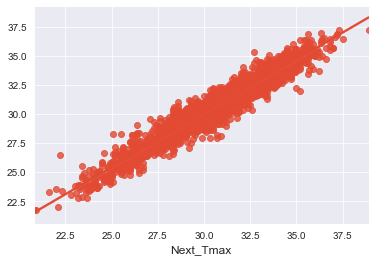

In [118]:
sns.regplot(y_test,y_gbrt_pred)

##### GREAT , we are able to achieve higher accuracy by hyperparameter tuning.Hence, this is our best model.

# MODEL SAVING

In [117]:
import joblib
joblib.dump(gbr_t,'temp_max.pkl')

['temp_max.pkl']

##### 1.) FOR 'Next_Tmin'¶

In [140]:
#Treating skewed data for features :

x_ = df1.drop(columns=['Next_Tmin'],axis=1) #Seperating feature and label in x and y
y_ = df1['Next_Tmin']

for index in x_.skew().index:
    if x_.skew().loc[index]>0.5:
        x_[index]=np.cbrt(x_[index])
        if x_.skew().loc[index]<-0.5:
            x_[index]=np.square(x_[index])

In [120]:
x_.skew()

station             0.004649
Present_Tmax       -0.227490
Present_Tmin       -0.217935
LDAPS_RHmin         0.284346
LDAPS_RHmax        -0.755434
LDAPS_Tmax_lapse   -0.096644
LDAPS_Tmin_lapse   -0.381931
LDAPS_WS            0.576039
LDAPS_LH           -0.312649
LDAPS_CC1           0.487257
LDAPS_CC2           0.473759
LDAPS_CC3           0.191622
LDAPS_CC4          -0.454967
LDAPS_PPT1          1.989819
LDAPS_PPT2          2.317437
LDAPS_PPT3          2.637855
LDAPS_PPT4          2.956772
lat                 0.104304
lon                -0.286980
DEM                 0.943008
Slope               0.626847
Solar radiation    -0.501098
Next_Tmax          -0.268366
day                 0.003300
month              -0.197828
year                0.011210
dtype: float64

In [121]:
#Applying Standard Scalar on feature datasets

scalar = StandardScaler()
X_ = scalar.fit_transform(x_)

In [141]:
#Finding Best Random State on Linear Regression


max_accu=0
max_rs = 0
for i in range(1,10):
    x_train,x_test,y_train,y_test = train_test_split(X_,y_,test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.843738721320732 on Random State 1


In [143]:
x_train,x_test,y_train,y_test = train_test_split(X_,y_,test_size = 0.25, random_state = 1)


In [144]:
resltss=[]
#To save model scores
MSE__=[]
#To save Mean Squared Error scores

In [145]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred=lr.predict(x_test)
r2_lr=r2_score(y_test,y_lr_pred)

print("R2 SCORE :",r2_lr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_lr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_lr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_lr_pred)))

resltss.append(r2_lr)
MSE__.append(mean_squared_error(y_test,y_lr_pred))

R2 SCORE : 0.843738721320732
Mean Squared Error :  0.8618084249840616
Mean Absolute Error :  0.7319416983898517
Root Mean squared Error :  0.9283363749116273


In [146]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr_pred=rfr.predict(x_test)
r2_rfr=r2_score(y_test,y_rfr_pred)

print("R2 SCORE :",r2_rfr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rfr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rfr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rfr_pred)))

resltss.append(r2_rfr)
MSE__.append(mean_squared_error(y_test,y_rfr_pred))

R2 SCORE : 0.9063167868856203
Mean Squared Error :  0.516679391234634
Mean Absolute Error :  0.5459663281667557
Root Mean squared Error :  0.7188041396894108


In [147]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr_pred=dtr.predict(x_test)
r2_dtr=r2_score(y_test,y_dtr_pred)

print("R2 SCORE :",r2_dtr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_dtr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_dtr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_dtr_pred)))

resltss.append(r2_dtr)
MSE__.append(mean_squared_error(y_test,y_dtr_pred))

R2 SCORE : 0.7700567510866507
Mean Squared Error :  1.2681774452164618
Mean Absolute Error :  0.8126135756280065
Root Mean squared Error :  1.1261338487126926


In [148]:
rg=Ridge(alpha=0.001)
rg.fit(x_train,y_train)
y_rg_pred=rg.predict(x_test)
r2_rg=r2_score(y_test,y_rg_pred)

print("R2 SCORE :",r2_rg)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rg_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rg_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rg_pred)))

resltss.append(r2_rg)
MSE__.append(mean_squared_error(y_test,y_rg_pred))

R2 SCORE : 0.8437387157629531
Mean Squared Error :  0.8618084556361897
Mean Absolute Error :  0.7319417547802918
Root Mean squared Error :  0.9283363914207984


In [149]:
ls=Lasso(alpha=0.0002)
ls.fit(x_train,y_train)
y_ls_pred=rg.predict(x_test)
r2_ls=r2_score(y_test,y_ls_pred)

print("R2 SCORE :",r2_ls)
print("Mean Squared Error : ",mean_squared_error(y_test,y_ls_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_ls_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_ls_pred)))

resltss.append(r2_ls)
MSE__.append(mean_squared_error(y_test,y_ls_pred))

R2 SCORE : 0.8437387157629531
Mean Squared Error :  0.8618084556361897
Mean Absolute Error :  0.7319417547802918
Root Mean squared Error :  0.9283363914207984


In [150]:
# Creating Dataframe

models2 = pd.DataFrame({"ML Models":["Linear Regression","Random Forest",
                                   "Decision Tree","Ridge","Lasso"],"Scores":resltss})

In [151]:
models2["Mean Squared Error"]=MSE__
models2

,ML Models,Scores,Mean Squared Error
0,Linear Regression,0.843739,0.861808
1,Random Forest,0.906317,0.516679
2,Decision Tree,0.770057,1.268177
3,Ridge,0.843739,0.861808
4,Lasso,0.843739,0.861808


In [152]:
#We are doing here 5 fold cross validation

cvlr=cross_val_score(lr,X_,y_,cv=5)
cvrfr=cross_val_score(rfr,X_,y_,cv=5)
cvdtr=cross_val_score(dtr,X_,y_,cv=5)
cvrg=cross_val_score(rg,X_,y_,cv=5)
cvls=cross_val_score(ls,X_,y_,cv=5)

print("CV SCORE LR : " , cvlr.mean())
print("CV SCORE RFR : " , cvrfr.mean())
print("CV SCORE DTR : " , cvdtr.mean())
print("CV SCORE Ridge : " , cvrg.mean())
print("CV SCORE Lasso : " , cvls.mean())

CV SCORE LR :  0.7795165749318653
CV SCORE RFR :  0.7791805772811444
CV SCORE DTR :  0.5351792865092027
CV SCORE Ridge :  0.7795166411702785
CV SCORE Lasso :  0.7796904728954821


<AxesSubplot:xlabel='Next_Tmin'>

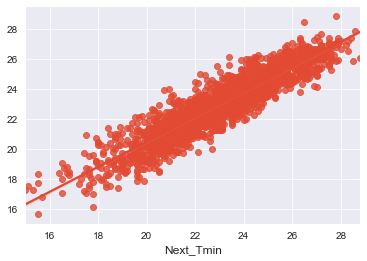

In [153]:
sns.regplot(y_test,y_lr_pred)

##### Since, difference between our model accuracy and cv score is very less for linear regression.So, we go for hyperparameter tuning for linear regression model.

### HYPERPARAMETER TUNING TO BE DONE ON LINEAR REGRESSION MODEL

In [155]:
params_ = {
    'copy_X': [True,False],
    'n_jobs':[-1],
    'normalize': [False]
}

In [156]:
Grid_cv = GridSearchCV(LinearRegression(),param_grid=params_,cv=5)

#Using 5 fold cross validation
Grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False], 'n_jobs': [-1],
                         'normalize': [False]})

In [158]:
Grid_cv.best_params_

{'copy_X': True, 'n_jobs': -1, 'normalize': False}

In [159]:
# Building best model using best parameters :

lr_t=LinearRegression(copy_X=True,n_jobs=-1,normalize=False)
lr_t.fit(x_train,y_train)
y_lrt_pred=lr.predict(x_test)
r2_lrt=r2_score(y_test,y_lrt_pred)

print("R2 SCORE :",r2_lrt)
print("Mean Squared Error : ",mean_squared_error(y_test,y_lrt_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_lrt_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_lrt_pred)))



R2 SCORE : 0.843738721320732
Mean Squared Error :  0.8618084249840616
Mean Absolute Error :  0.7319416983898517
Root Mean squared Error :  0.9283363749116273


<AxesSubplot:xlabel='Next_Tmin'>

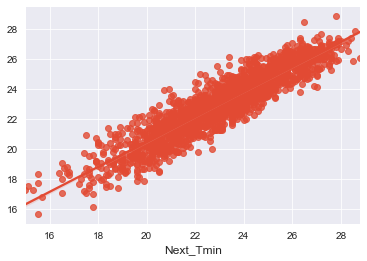

In [160]:
sns.regplot(y_test,y_lrt_pred)

# MODEL SAVING

In [161]:
joblib.dump(lr_t,'temp_minimum.pkl')

['temp_minimum.pkl']

##### CONCLUSION :

- For predicting next maximum temperature Random Forest Regressor is best fit model with tuned accuracy of 93%

- For predicting next minimum temperature Linear Regression is best fit model with accuracy of 84%%